## First Task:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

from pylab import rcParams
rcParams['figure.figsize'] = 8, 7
data = pd.read_csv('/home/azza/My thesis/Final Data/Lome/Lome.csv')
data

,Date,Consumption,Pop,Tmean,RH,Wind,Consumption/KWH
0,01/01/2013,1613.0,1667113,27.5,60.7,2.84,0.967541
1,02/01/2013,1860.0,"1,667,333",26.7,66.1,2.20,1.115554
2,03/01/2013,1860.0,"1,667,553",27.0,73.3,2.05,1.115407
3,04/01/2013,2142.0,"1,667,773",27.6,73.1,1.88,1.284347
4,05/01/2013,1878.0,"1,667,993",27.2,70.9,2.45,1.125904
...,...,...,...,...,...,...,...
1456,27/12/2016,2639.0,"2,011,053",27.0,74.4,1.95,1.312248
1457,28/12/2016,2693.0,"2,011,306",26.6,73.4,1.98,1.338931
1458,29/12/2016,2625.0,"2,011,558",26.4,73.8,1.93,1.304959
1459,30/12/2016,2614.0,"2,011,811",26.4,78.5,2.15,1.299327


In [2]:
# Remove the Date, Consumption and Population
ts = data.drop(columns = ['Consumption', 'Pop'])
ts

,Date,Tmean,RH,Wind,Consumption/KWH
0,01/01/2013,27.5,60.7,2.84,0.967541
1,02/01/2013,26.7,66.1,2.20,1.115554
2,03/01/2013,27.0,73.3,2.05,1.115407
3,04/01/2013,27.6,73.1,1.88,1.284347
4,05/01/2013,27.2,70.9,2.45,1.125904
...,...,...,...,...,...
1456,27/12/2016,27.0,74.4,1.95,1.312248
1457,28/12/2016,26.6,73.4,1.98,1.338931
1458,29/12/2016,26.4,73.8,1.93,1.304959
1459,30/12/2016,26.4,78.5,2.15,1.299327


In [3]:
#setting the index to my data

ts['Date'] = pd.to_datetime(ts['Date'])
ts.set_index('Date', inplace=True)
data = ts.asfreq('D')
data

,Tmean,RH,Wind,Consumption/KWH
Date,,,,
2013-01-01,27.5,60.7,2.84,0.967541
2013-01-02,27.9,56.3,2.76,1.301127
2013-01-03,29.2,80.2,3.96,1.424920
2013-01-04,28.5,78.4,3.16,1.096676
2013-01-05,25.9,88.8,2.03,1.010325
...,...,...,...,...
2016-12-27,27.0,74.4,1.95,1.312248
2016-12-28,26.6,73.4,1.98,1.338931
2016-12-29,26.4,73.8,1.93,1.304959


In [4]:
# Resample the data to weekly frequency
ts_resampled = data.resample('W').mean()
# Print the first 5 rows of the weekly data
ts_resampled.head()

,Tmean,RH,Wind,Consumption/KWH
Date,,,,
2013-01-06,27.650000,74.850000,2.980000,1.155943
2013-01-13,26.428571,81.828571,3.494286,1.140486
2013-01-20,28.485714,80.842857,3.384286,1.332617
2013-01-27,28.485714,80.428571,3.667143,1.327037
2013-02-03,27.871429,73.671429,2.687143,1.271762


In [5]:
def plot_data(ts_resampled):
    # plot line plot for each column
    for col in ['Consumption/KWH', 'Tmean', 'Wind', 'RH']:
        plt.figure(figsize=(10, 4))
        plt.plot(ts_resampled[col])
        plt.title(col)
        plt.show()
        
    # plot boxplot for each column
    for col in ['Consumption/KWH', 'Tmean', 'Wind', 'RH']:
        fig, ax = plt.subplots(figsize=(10,5))
        ax.set_title(col)
        sns.boxplot(x=ts_resampled[col], ax=ax)
        plt.show()

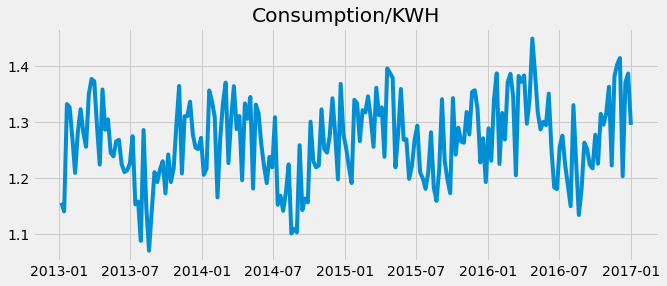

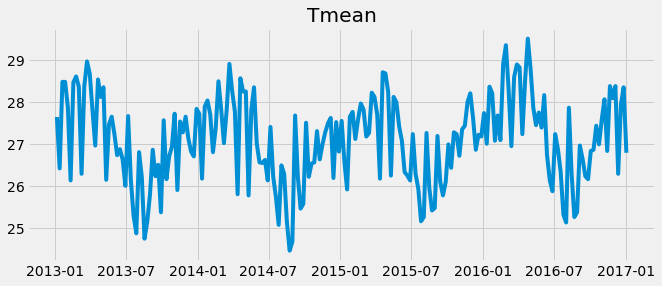

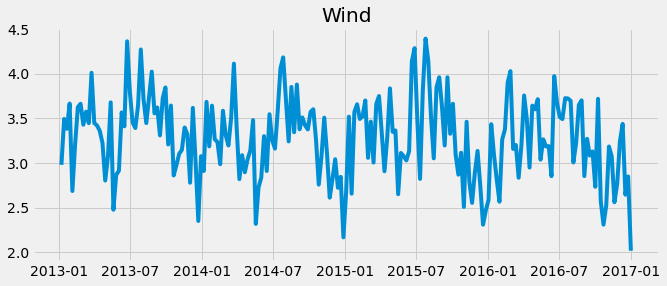

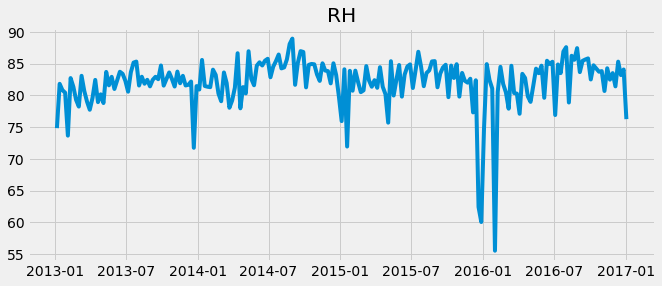

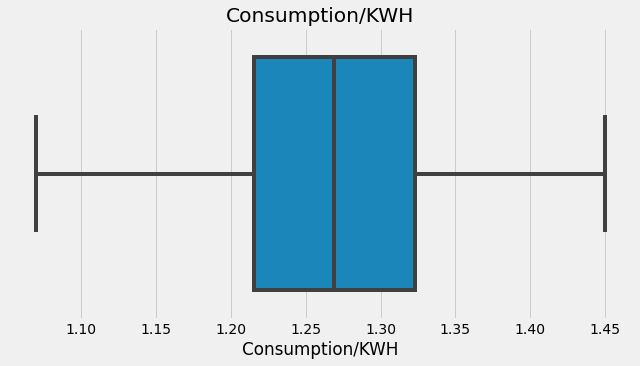

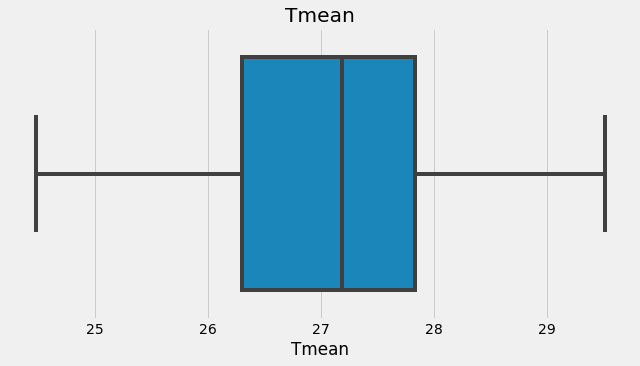

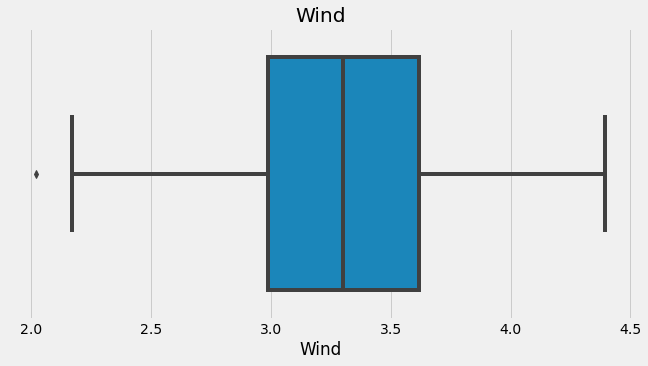

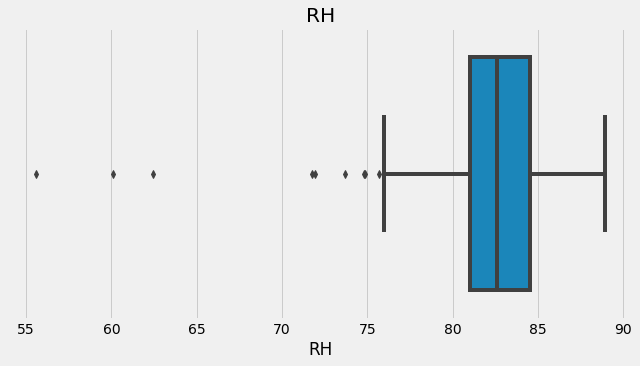

In [6]:
plot_data(ts_resampled)

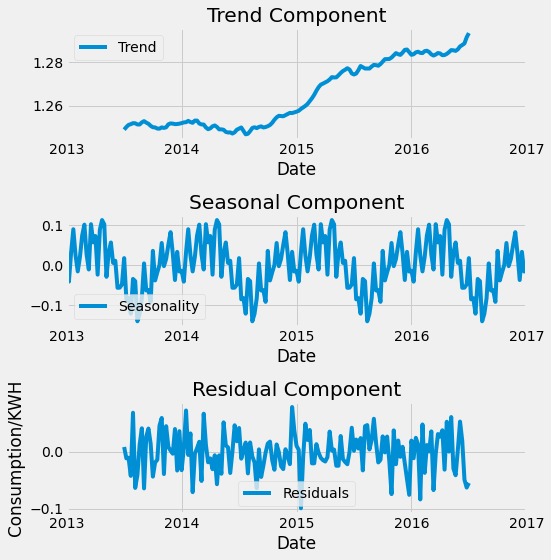

In [7]:
# Decompose the time series into trend, seasonal, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_resampled['Consumption/KWH'], model='additive')

# Plot the trend, seasonal, and residual components in subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
decomposition.trend.plot(ax=ax[0], label='Trend')
decomposition.seasonal.plot(ax=ax[1], label='Seasonality')
plt.ylabel('Consumption/KWH')
decomposition.resid.plot(ax=ax[2], label='Residuals')
ax[0].set(title='Trend Component')
ax[1].set(title='Seasonal Component')
ax[2].set(title='Residual Component')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.tight_layout()

#plt.title('Electricity Consumption trend, seasonality and the error')
plt.show()

In [ ]:
# Create a scatter plot of temperature vs. electricity consumption
plt.scatter(ts['Tmean'], ts['Consumption/KWH'])
plt.xlabel('Temperature in degree Celsius')
plt.ylabel('Electricity consumption in KWH')
plt.show()

In [ ]:
# Create a scatter plot of temperature vs. electricity consumption
plt.scatter(ts['Tmean'], ts['RH'])
plt.xlabel('Temperature in degree Celsius')
plt.ylabel('Relative humidity in percentage')
plt.show()

In [ ]:
# Create a scatter plot of temperature vs. electricity consumption
plt.scatter(ts['Consumption/KWH'], ts['RH'])
plt.xlabel('Electricity consumption in KWH')
plt.ylabel('Humidity in percentage')
plt.show()

In [ ]:
# Create a scatter plot of temperature vs. electricity consumption
plt.scatter(ts['Wind'], ts['Consumption/KWH'])
plt.xlabel('Wind speed in meter/second')
plt.ylabel('Electricity consumption in KWh')
plt.show()

### Applting the differencing and the normalisation:

In [8]:
ts_resampled

,Tmean,RH,Wind,Consumption/KWH
Date,,,,
2013-01-06,27.650000,74.850000,2.980000,1.155943
2013-01-13,26.428571,81.828571,3.494286,1.140486
2013-01-20,28.485714,80.842857,3.384286,1.332617
2013-01-27,28.485714,80.428571,3.667143,1.327037
2013-02-03,27.871429,73.671429,2.687143,1.271762
...,...,...,...,...
2016-12-04,28.385714,81.428571,3.244286,1.415145
2016-12-11,26.300000,85.314286,3.438571,1.203439
2016-12-18,27.942857,83.200000,2.645714,1.371090


In [9]:
from sklearn.preprocessing import StandardScaler
# Apply normalization to the data
scaler = StandardScaler()
scaler = scaler.fit(ts_resampled)
ts_norm = scaler.transform(ts_resampled)
ts_norm
# Concatenate time column back to the normalized data
#data_norm = pd.concat([time, pd.DataFrame(ts_norm, columns=ts_drop.columns)], axis=1)
#data_norm



# Separate time column from data
#time = data['Time']
#ts = data.drop(['Time'], axis=1)

# Apply normalization to the data
#scaler = StandardScaler()
#scaler = scaler.fit(ts)
#ts_norm = scaler.transform(ts)

# Concatenate time column back to the normalized data
#data_norm = pd.concat([time, pd.DataFrame(ts_norm, columns=ts.columns)], axis=1)


array([[ 5.28081766e-01, -1.85674225e+00, -6.83060608e-01,
        -1.50353774e+00],
       [-6.62350569e-01, -8.13502862e-02,  4.67483884e-01,
        -1.71398871e+00],
       [ 1.34258810e+00, -3.32122129e-01,  2.21395201e-01,
         9.01957096e-01],
       [ 1.34258810e+00, -4.37518991e-01,  8.54194672e-01,
         8.25988385e-01],
       [ 7.43891137e-01, -2.15657815e+00, -1.33823178e+00,
         7.33927428e-02],
       [-9.40814273e-01,  1.47615310e-01, -1.71707501e-01,
        -7.76518422e-01],
       [ 1.32866492e+00, -1.97650271e-01,  7.64707878e-01,
         2.24624208e-01],
       [ 1.46789677e+00, -7.24634580e-01,  8.47802758e-01,
         7.75782985e-01],
       [ 1.23120262e+00, -9.93578295e-01,  3.23665822e-01,
         2.08857950e-01],
       [-7.87659236e-01,  2.38474673e-01,  6.49653429e-01,
        -1.39853259e-01],
       [ 1.24512580e+00, -3.72100249e-01,  3.62017305e-01,
         1.13872867e+00],
       [ 1.81597640e+00, -7.97322070e-01,  1.62442029e+00,
      

In [11]:
df = pd.DataFrame(ts_norm)
df

,0,1,2,3
0,0.528082,-1.856742,-0.683061,-1.503538
1,-0.662351,-0.081350,0.467484,-1.713989
2,1.342588,-0.332122,0.221395,0.901957
3,1.342588,-0.437519,0.854195,0.825988
4,0.743891,-2.156578,-1.338232,0.073393
...,...,...,...,...
204,1.245126,-0.183113,-0.091809,2.025615
205,-0.787659,0.805437,0.342842,-0.856855
206,0.813507,0.267550,-1.430915,1.425781
207,1.217279,0.492881,-0.973893,1.646458


In [12]:
ts.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq=None)

In [13]:
df.columns = ['Tmean', 'RH', 'Wind', 'Consumption/KWH'] 
df.index = ts_resampled.index


In [14]:
df

,Tmean,RH,Wind,Consumption/KWH
Date,,,,
2013-01-06,0.528082,-1.856742,-0.683061,-1.503538
2013-01-13,-0.662351,-0.081350,0.467484,-1.713989
2013-01-20,1.342588,-0.332122,0.221395,0.901957
2013-01-27,1.342588,-0.437519,0.854195,0.825988
2013-02-03,0.743891,-2.156578,-1.338232,0.073393
...,...,...,...,...
2016-12-04,1.245126,-0.183113,-0.091809,2.025615
2016-12-11,-0.787659,0.805437,0.342842,-0.856855
2016-12-18,0.813507,0.267550,-1.430915,1.425781


In [15]:
def plot_data(df):
    # plot line plot for each column
    for col in ['Consumption/KWH', 'Tmean', 'Wind', 'RH']:
        plt.figure(figsize=(10, 4))
        plt.plot(df[col])
        plt.title(col)
        plt.show()
        
    # plot boxplot for each column
    for col in df.columns:
        fig, ax = plt.subplots(figsize=(10,5))
        ax.set_title(col)
        sns.boxplot(x=df[col], ax=ax)
        plt.show()

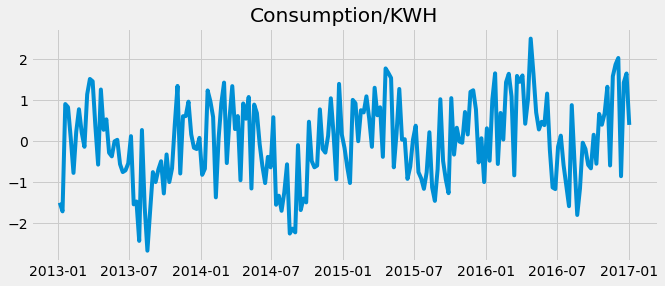

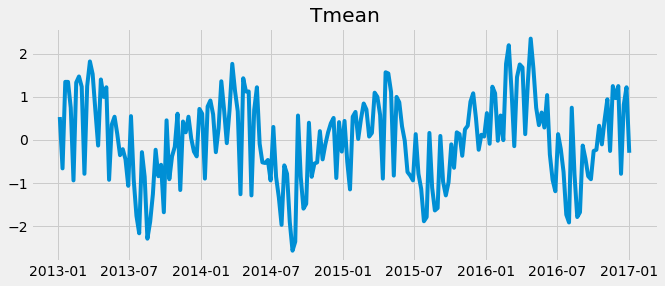

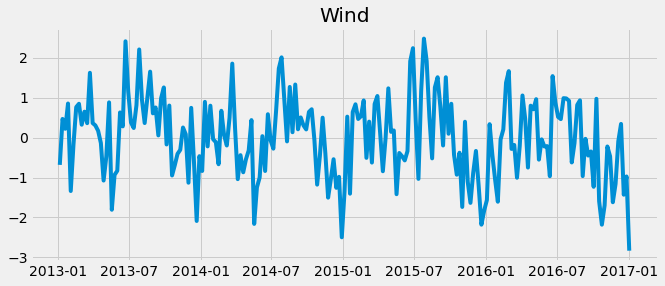

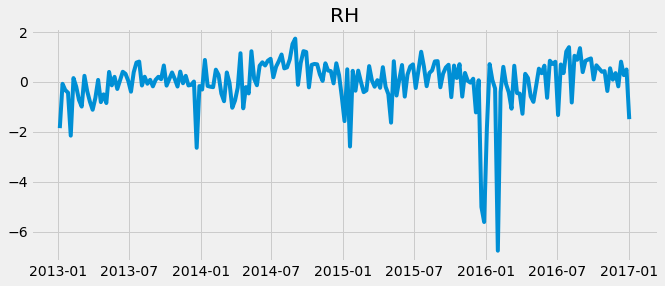

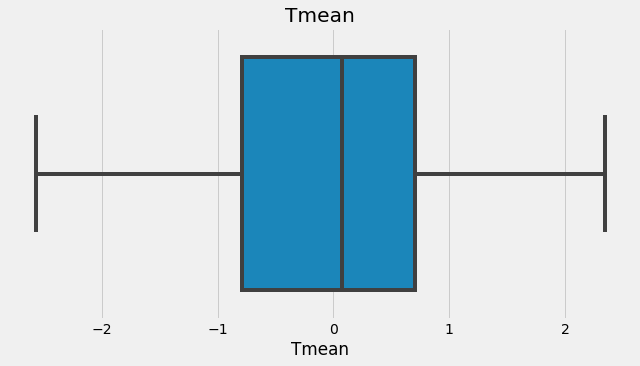

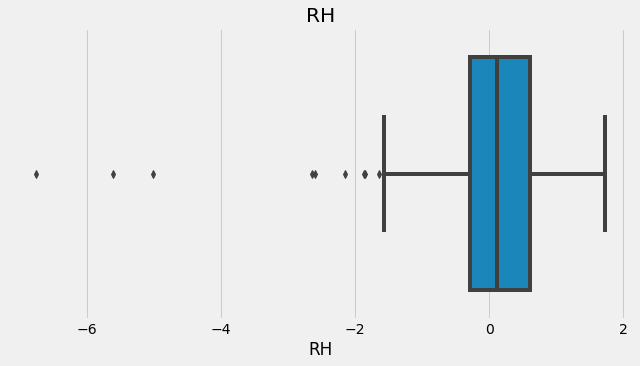

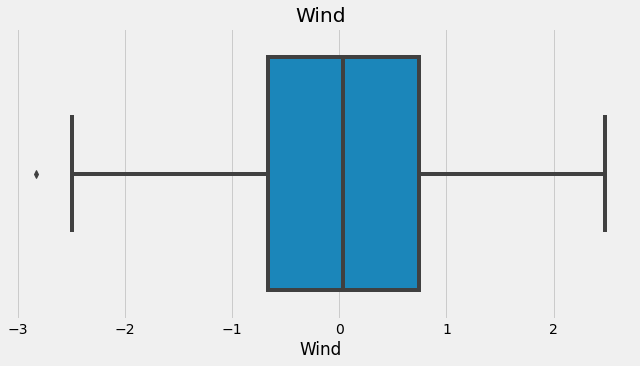

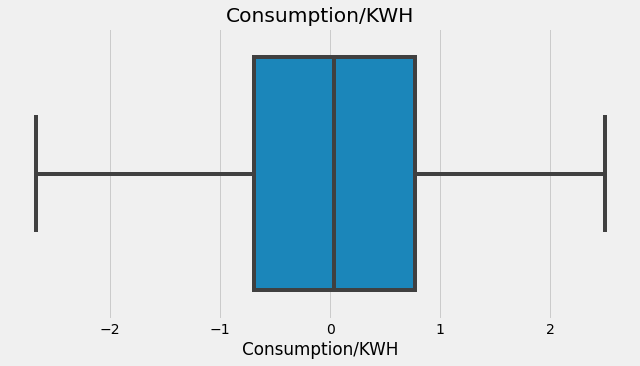

In [16]:
plot_data(df)

## Dealing with the outliers with IQR:

In [17]:
def remove_outliers(df):
    # calculate the lower and upper bounds for outliers
    Q1 = df['Tmean'].quantile(0.25)
    Q3 = df['Tmean'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # replace outliers below lower bound with lower bound and above upper bound with upper bound
    df.loc[df['Tmean'] < lower_bound, 'Tmean'] = lower_bound
    df.loc[df['Tmean'] > upper_bound, 'Tmean'] = upper_bound
    
    # calculate the lower and upper bounds for outliers
    Q1 = df['RH'].quantile(0.25)
    Q3 = df['RH'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # replace outliers below lower bound with lower bound and above upper bound with upper bound
    df.loc[df['RH'] < lower_bound, 'RH'] = lower_bound
    df.loc[df['RH'] > upper_bound, 'RH'] = upper_bound
    
    # calculate the lower and upper bounds for outliers
    Q1 = df['Wind'].quantile(0.25)
    Q3 = df['Wind'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # replace outliers below lower bound with lower bound and above upper bound with upper bound
    df.loc[df['Wind'] < lower_bound, 'Wind'] = lower_bound
    df.loc[df['Wind'] > upper_bound, 'Wind'] = upper_bound
    
    # calculate the lower and upper bounds for outliers
    Q1 = df['Consumption/KWH'].quantile(0.25)
    Q3 = df['Consumption/KWH'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # replace outliers below lower bound with lower bound and above upper bound with upper bound
    df.loc[df['Consumption/KWH'] < lower_bound, 'Consumption/KWH'] = lower_bound
    df.loc[df['Consumption/KWH'] > upper_bound, 'Consumption/KWH'] = upper_bound
    
    # plot boxplots for each column
    fig, axs = plt.subplots(ncols=4, figsize=(20,5))
    sns.boxplot(x=df['Tmean'], ax=axs[0])
    sns.boxplot(x=df['RH'], ax=axs[1])
    sns.boxplot(x=df['Wind'], ax=axs[2])
    sns.boxplot(x=df['Consumption/KWH'], ax=axs[3])
    
    return df


,Tmean,RH,Wind,Consumption/KWH
Date,,,,
2013-01-06,0.528082,-1.635045,-0.683061,-1.503538
2013-01-13,-0.662351,-0.081350,0.467484,-1.713989
2013-01-20,1.342588,-0.332122,0.221395,0.901957
2013-01-27,1.342588,-0.437519,0.854195,0.825988
2013-02-03,0.743891,-1.635045,-1.338232,0.073393
...,...,...,...,...
2016-12-04,1.245126,-0.183113,-0.091809,2.025615
2016-12-11,-0.787659,0.805437,0.342842,-0.856855
2016-12-18,0.813507,0.267550,-1.430915,1.425781


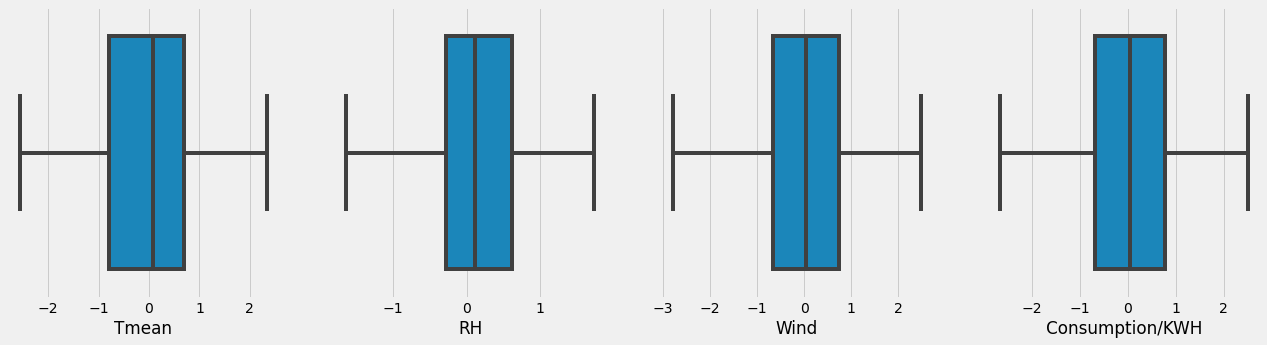

In [18]:
remove_outliers(df)

## Split the data into train, test:

In [79]:
df.index[143]

Timestamp('2015-10-04 00:00:00', freq='W-SUN')

In [ ]:
X[1]

In [33]:
## Create the datasets
percent_train = 0.9  # the percentage of the data we want in the training_set
past = 30           # the number of days in the past that we will use
# future = 1

 #Split into X and Y
X, Y = [], []
for i in range(len(df) - past):
    x = df[i:i+past]
    y = df.iloc[i+past, 3] # take the column number 3 : Consumption/KWH
    X.append(x)
    Y.append(y)
X_a, Y_a = np.asarray(X), np.asarray(Y)

In [56]:
Y_a

array([ 0.26876329, -1.6066328 , -2.67347988, -1.69515472, -0.75776804,
       -0.99944733, -0.69510149, -0.49192549, -1.27758543, -0.32662626,
       -1.00002733, -0.66519981,  0.40372948,  1.34430904, -0.79175105,
        0.60557391,  0.60761374,  0.96031184,  0.16259287, -0.1637056 ,
       -0.194739  ,  0.07752008, -0.82406482, -0.67477231,  1.23351868,
        0.97017004,  0.58797889, -1.37283894,  0.06140448,  0.92192629,
        1.4252411 , -0.53681026,  0.56009901,  1.33920451,  0.29198062,
        0.60904253, -0.95521534,  0.91590171,  0.54485796,  1.07378794,
       -1.15723073,  0.88868956,  0.68035849, -0.07336852, -0.6098257 ,
       -1.02470277, -0.38590466, -0.64058551,  0.58089443, -1.55319653,
       -1.33188885, -1.70075147, -1.2493997 , -0.56727758, -2.25562564,
       -2.1355784 , -2.22680595, -0.1007402 , -1.68242255, -1.40175399,
       -1.49545622,  0.47122452, -0.48480131, -0.63996515, -0.59788222,
        0.77298922, -0.19193895, -0.28204548,  0.12662701,  1.04

In [77]:
X

[               Tmean        RH      Wind  Consumption/KWH
 Date                                                     
 2013-01-06  0.528082 -1.635045 -0.683061        -1.503538
 2013-01-13 -0.662351 -0.081350  0.467484        -1.713989
 2013-01-20  1.342588 -0.332122  0.221395         0.901957
 2013-01-27  1.342588 -0.437519  0.854195         0.825988
 2013-02-03  0.743891 -1.635045 -1.338232         0.073393
 2013-02-10 -0.940814  0.147615 -0.171708        -0.776518
 2013-02-17  1.328665 -0.197650  0.764708         0.224624
 2013-02-24  1.467897 -0.724635  0.847803         0.775783
 2013-03-03  1.231203 -0.993578  0.323666         0.208858
 2013-03-10 -0.787659  0.238475  0.649653        -0.139853
 2013-03-17  1.245126 -0.372100  0.362017         1.138729
 2013-03-24  1.815976 -0.797322  1.624420         1.513575
 2013-03-31  1.523590 -1.120781  0.365213         1.456190
 2013-04-07  0.674275 -0.644678  0.304490         0.355730
 2013-04-14 -0.133270  0.074928  0.170260        -0.5747

In [36]:
df_list = pd.concat(X)
df_list

,Tmean,RH,Wind,Consumption/KWH
Date,,,,
2013-01-06,0.528082,-1.635045,-0.683061,-1.503538
2013-01-13,-0.662351,-0.081350,0.467484,-1.713989
2013-01-20,1.342588,-0.332122,0.221395,0.901957
2013-01-27,1.342588,-0.437519,0.854195,0.825988
2013-02-03,0.743891,-1.635045,-1.338232,0.073393
...,...,...,...,...
2016-11-27,0.966662,0.347506,-1.159258,1.867655
2016-12-04,1.245126,-0.183113,-0.091809,2.025615
2016-12-11,-0.787659,0.805437,0.342842,-0.856855


In [51]:
int(len(X_a)*0.9) # size of the train 


161

In [53]:
X_a.shape

(179, 30, 4)

In [54]:
Y_a.shape

(179,)

In [52]:
179-161

18

In [57]:
#Split into training and test set

size_train = int( percent_train * len(X_a) )  # the number of elements we want in the training set
X_train = X_a[:size_train] #size of the train is 161 from the beginning till 160 is the X_train
y_train = Y_a[:size_train]
X_test  = X_a[size_train:]
y_test  = Y_a[size_train:]

In [61]:
y_test

array([-0.04025129, -0.19235912, -0.58066737, -0.66558571,  0.15326673,
       -0.5530331 ,  0.66202249,  0.3974525 ,  0.6751358 ,  1.32280207,
       -0.59520956,  1.57926978,  1.86765525,  2.02561459, -0.85685479,
        1.42578059,  1.64645777,  0.39354066])

In [62]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (161, 30, 4)
y_train.shape: (161,)
X_test.shape: (18, 30, 4)
y_test.shape: (18,)


In [75]:
X_train_2d = X_train.reshape(-1, X_train.shape[-1])
#X_test_2d = X_test.reshape()
print("X_train_reshaped_to_2D :",X_train_2d)


X_test_2d = X_test.reshape(-1, X_test.shape[-1])
print("X_test_reshaped_to_2D :",X_train_2d)

X_train_reshaped_to_2D : [[ 0.52808177 -1.6350454  -0.68306061 -1.50353774]
 [-0.66235057 -0.08135029  0.46748388 -1.71398871]
 [ 1.3425881  -0.33212213  0.2213952   0.9019571 ]
 ...
 [ 0.74389114 -0.83003144 -0.62233743  0.87570676]
 [-0.80158242  1.04167145 -0.13655197 -0.51933156]
 [-1.79012857  0.88175897  0.81903915 -1.80228032]]
X_test_reshaped_to_2D : [[ 0.52808177 -1.6350454  -0.68306061 -1.50353774]
 [-0.66235057 -0.08135029  0.46748388 -1.71398871]
 [ 1.3425881  -0.33212213  0.2213952   0.9019571 ]
 ...
 [ 0.74389114 -0.83003144 -0.62233743  0.87570676]
 [-0.80158242  1.04167145 -0.13655197 -0.51933156]
 [-1.79012857  0.88175897  0.81903915 -1.80228032]]


In [ ]:
#X_train = train.iloc[:,:3]
#y_train = train.iloc[:,-1]
#X_test = test.iloc[:,:3]
#y_test = test.iloc[:,-1]

## Using XGBoost :

In [76]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       early_stopping_rounds=50,
                       max_depth=1,
                       learning_rate=0.01)
reg.fit(X_train_2d, y_train,
        eval_set=[(X_train_2d, y_train), (X_test_2d, y_test)],
        verbose=100)

XGBoostError: [15:39:44] ../src/data/data.cc:455: Check failed: this->labels.Size() % this->num_row_ == 0 (161 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) /home/azza/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x20b233) [0x7f92b5acd233]
  [bt] (1) /home/azza/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x217413) [0x7f92b5ad9413]
  [bt] (2) /home/azza/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x2196b0) [0x7f92b5adb6b0]
  [bt] (3) /home/azza/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xad) [0x7f92b59fcf3d]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.7(+0x6d1d) [0x7f931252dd1d]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.7(+0x6289) [0x7f931252d289]
  [bt] (6) /usr/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x13360) [0x7f9311f39360]
  [bt] (7) /usr/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x98d8) [0x7f9311f2f8d8]
  [bt] (8) /usr/bin/python3(_PyObject_MakeTpCall+0x39b) [0x51d89b]



In [ ]:
X_test_reshaped

In [ ]:
X_test

## My prediction on the training and the test:

In [ ]:
#test['prediction'] = reg.predict(X_test)
#train['prediction'] = reg.predict(X_train)

#df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
#ax = df[['Consumption/KWH']].plot(figsize=(15, 5))
#test['prediction'].plot(ax=ax)

#train['prediction'].plot(ax=ax)

#plt.legend(['Truth Data', 'Predictions'])
#ax.set_title('Raw Data and Prediction')
#ax.axvline('01-01-2016', color='black', ls='--')
#plt.show()

X_test_pred = reg.predict(X_test_reshaped)
X_train_pred = reg.predict(X_train_reshaped)

#df = df.merge(X_test_pred, how='left', left_index=True, right_index=True)
#ax = df[['Consumption/KWH']].plot(figsize=(15, 5))
#X_test_pred.plot()
X_train_pred_df = pd.DataFrame(X_train_pred)
df.index = X_train_pred_df.index

In [ ]:
X_test_pred

In [ ]:
plt.figure(figsize=(12,5))
y_train.plot()
train['prediction'].plot();

In [ ]:
plt.figure(figsize=(8,5))
y_test.plot()
test['prediction'].plot();

## Evaluating the model:

In [ ]:
def compute_mase(actual, predicted, seasonality):
    naive_preds = actual.shift(seasonality).reindex_like(actual)  # use the same season last year as forecast
    naive_error = np.mean(np.abs(actual - naive_preds))
    model_error = np.mean(np.abs(actual - predicted))
    mase = model_error / naive_error
    return mase

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate MSE and RMSE
mse = mean_squared_error(test['Consumption/KWH'], df['prediction'].loc[test.index])
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((test['Consumption/KWH'] - df['prediction'].loc[test.index]) / test['Consumption/KWH'])) * 100

# Calculate MAE
mae = mean_absolute_error(test['Consumption/KWH'], df['prediction'].loc[test.index])

#calculate mase
mase = compute_mase(test['Consumption/KWH'], df['prediction'].loc[test.index], 7)


# Print the results
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
print("MAE: ", mae)
print('MASE:', mase)


## ACF and PACF :

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
y_test = test['Consumption/KWH']
y_pred = reg.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

plot_acf(residuals,  lags=20, alpha=0.05)
plot_pacf(residuals,  lags=20, alpha=0.05)
ax.set(title='ACF and PACF of Residuals')
plt.show()

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Add a line for the mean of the residuals
mean_residuals = np.mean(residuals)
plt.axvline(x=mean_residuals, color='r', linestyle='--', label='Mean Residuals')

plt.legend()
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Test for autocorrelation in the residuals
test_results = acorr_ljungbox(residuals, lags=30, boxpierce=True)

# Print the p-values
print('Ljung-Box test p-values:', test_results)

In [ ]:
# Plot time series plot of residuals
plt.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Time Series Plot of Residuals')
plt.show()

## Second Task:

In [ ]:
# Select only the relevant columns
cols = ['Consumption/KWH','Tmean', 'RH', 'Wind']
data_subset = df.loc[:, cols]

# Compute the correlation matrix
corr_matrix = data_subset.corr()

# Create a heatmap plot of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## LSTM :

In [ ]:
## Create the datasets
percent_train = 0.9  # the percentage of the data we want in the training_set
past = 30            # the number of days in the past that we will use
# future = 1

# Split into X and Y
X, Y = [], []
for i in range(len(data) - past):
  x = data[i:i+past]
  y = data[i+past, 3] # take the column number 3 : Consumption/KWH
  X.append(x)
  Y.append(y)
X, Y = np.array(X), np.array(Y)

# Split into training and test set
size_train = int( percent_train * len(X) )  # the number of elements we want in the training set
trainX = X[:size_train]
trainY = Y[:size_train]
testX  = X[size_train:]
testY  = Y[size_train:]